Data Science and Business Analytics (GRIP May21)
Task 1 : Prediction using supervised ML
Task Objective: To predict the percentage of an student based on the no. of study hours using simple linear regression.

Name:Samar Prakash

Simple Linear Regression

In [3]:
#Importing the essential Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("http://bit.ly/w-data")
#Printing the first 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


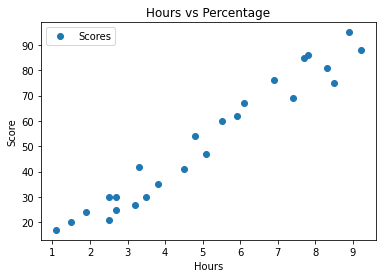

In [7]:
df.plot(x='Hours', y='Scores' , style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score')
plt.show()

There is a positive linear relation between the number of hours studied and percentage of score.

PREPARING THE DATA

In [9]:
#Dividing the data into "attributes" (inputs) and "labels" (outputs).
x = df.loc[:, ['Hours']]
y = df.loc[:, ['Scores']]

In [10]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of data is used for testing
#random_state is used to avoid uncertinity in training or testing data
pd.concat([x_train, y_train], axis=1, ignore_index=False) #viewing training Datasets

,Hours,Scores
22,3.8,35
17,1.9,24
24,7.8,86
23,6.9,76
14,1.1,17
1,5.1,47
10,7.7,85
13,3.3,42
8,8.3,81
6,9.2,88


In [11]:
pd.concat([x_test, y_test], axis=1, ignore_index=False) #viewing testing datasets

,Hours,Scores
5,1.5,20
2,3.2,27
19,7.4,69
16,2.5,30
11,5.9,62


TRAINING THE ALGORITHM

In [12]:
#After splitting the data, its time to train the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training completed")
print('Intercept value is:',regressor.intercept_)
print('Linear coefficient is:',regressor.coef_)

Training completed
Intercept value is: [2.01816004]
Linear coefficient is: [[9.91065648]]


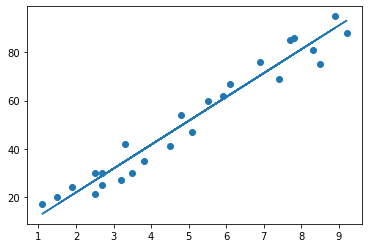

In [13]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [14]:
pd.concat([x_test, y_test], axis=1) # Testing data - In Hours

,Hours,Scores
5,1.5,20
2,3.2,27
19,7.4,69
16,2.5,30
11,5.9,62


In [15]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


In [30]:
y_test1= y_test.reset_index(drop=True)
y_test1

,Scores
0,20
1,27
2,69
3,30
4,62


In [31]:
#Predicting the Scores
y_pred = pd.DataFrame(regressor.predict(x_test))# Predicting the scores
y_pred

,0
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


In [32]:
# Comparing Actual vs Predicted
df1= pd.concat([y_test1, y_pred], axis=1, ignore_index=True)
df1.columns =['Actual Score', 'Predicted Score']
df1

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# You can also test with your own data
hours=[[9.25]]
score_pred=regressor.predict(hours)
score_pred

array([[93.69173249]])

In [187]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [ ]:
Conclusion
For a student studying 9.25Hrs a day , the model predicts his score as 93.6917